# **Partie 1**

# 1.1 Importations des librairies

In [1]:
#------------------------------------------
# projet 4: Anticipez les besoins en consommation de bâtiments
# Auteur : Mohamed MERAH
# Date: Novembre 2023
# OpenClassrooms 2023-2024
#-------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
#import sklearn
import missingno
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import scipy.stats as stats
import plotly.express as px
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# 1.2 Importation des données

In [2]:
data_2016_cleaned = pd.read_csv('C:/Users/misso/Desktop/Formation_DS_23_24_MERAH/2-Projet/4-Projet 4/1-Code/data_2016_cleaned.csv') 
data_2016_cleaned.shape

(1524, 40)

In [3]:
# Supression de la colonne  Unnamed: 0 
data_2016_cleaned = data_2016_cleaned.drop(columns='Unnamed: 0', axis = 1)

In [4]:
data_2016_cleaned

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0               1.0    2016.0      NonResidential               Hotel   
1               2.0    2016.0      NonResidential               Hotel   
2               3.0    2016.0      NonResidential               Hotel   
3               5.0    2016.0      NonResidential               Hotel   
4               8.0    2016.0      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
1519        50221.0    2016.0  Nonresidential COS               Other   
1520        50223.0    2016.0  Nonresidential COS               Other   
1521        50224.0    2016.0  Nonresidential COS               Other   
1522        50225.0    2016.0  Nonresidential COS  Mixed Use Property   
1523        50226.0    2016.0  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
1519          High Point Community Center  6920 34th Ave SW  Seattle    WA   
1520  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
1521                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
1522          South Park Community Center    8319 8th Ave S  Seattle    WA   
1523          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  SiteEnergyUseWN(kBtu)  \
0     98101.0                    0659000030  ...           7.456910e+06   
1     98101.0                    0659000220  ...           8.664479e+06   
2     98101.0                    0659000475  ...           7.393711e+07   
3     98101.0                    0659000640  ...           6.946800e+06   
4     98121.0                    0659000970  ...           1.465650e+07   
...       ...                           ...  ...                    ...   
1519  98115.0                    2524039059  ...           1.025432e+06   
1520  98108.0                    3558300000  ...           1.053706e+06   
1521  98117.0                    1794501150  ...           6.053764e+06   
1522  98117.0                    7883603155  ...           7.828413e+05   
1523  98119.5                    7857002030  ...           1.293722e+06   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0        2003882.00      1.156514e+06       3.946027e+06        12764.529300   
1              0.00      9.504252e+05       3.242851e+06        51450.816410   
2       21566554.00      1.451544e+07       4.952666e+07        14938.000000   
3        2214446.25      8.115253e+05       2.768924e+06        18112.130860   
4              0.00      1.573449e+06       5.368607e+06        88039.984380   
...             ...               ...                ...                 ...   
1519           0.00      1.853347e+05       6.323620e+05         2997.199951   
1520           0.00      1.162210e+05       3.965461e+05         5537.299805   
1521           0.00      5.252517e+05       1.792159e+06        39737.390630   
1522           0.00      1.022480e+05       3.488702e+05         3706.010010   
1523           0.00      1.267744e+05       4.325542e+05         7203.419922   

      NaturalGas(kBtu)  DefaultData  ComplianceStatus  TotalGHGEmissions  \
0         1.276453e+06          0.0         Compliant             249.98   
1         5.145082e+06          0.0         Compliant             295.86   
2         1.493800e+06          0.0         Compliant            2089.28   
3         1.811213e+06    

# 1.3 Sélection des données pertinentes pour la mission

Suppression des variables inutiles:

  - 'BuildingType': une fois les bâtiments non Résidentiel séléctionnées cette variable ne sera plus utile pour la suite
  - 'ComplianceStatus': une fois les données conforme 'Compliant' sélectionnées cette variable ne sera plus utile
   - 'City': 'Seattle' pour tous les données
   - 'State': 'WA' pour tous les données
   - 'TaxParcelIdentificationNumber': non utile,Numero identification (fiscale)
   - 'PropertyName': non utile. Peut être retrouvé si besoin à partir de l'identifiant unique du bâtiment 'OSEBuildingID'
   - 'NaturalGas(therms)': variable redondante peut être retrouvé à partir de 'NaturalGas(kBtu)'
   - 'Electricity(kWh)': variable redondante peut être retrouvé à partir de 'Electricity(kBtu)'
   - 'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf): variable qui prend en compte les conditions météo.
   - 'SourceEUIWN(kBtu/sf)': variable qui prend en compte les conditions météo. Non utile. On garde 'SourceEUI(kBtu/sf)'
   - 'SiteEnergyUseWN(kBtu)': variable qui prend en compte les conditions météo. Non utile. On garde 'SiteEnergyUse(kBtu)'
   - 'DefaultData': Non utile. 'False' sur tous les données qui restent
   - 'ZipCode,CouncilDistrictCode et 'Address': On gardera ,'Neighborhood','Latitude' et 'Longitude' pour la position du bâtiment.
   - PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseTypeGFA : surface totale, parking, bâtiment. On gardera que PropertyGFATotal.

In [5]:
data_2016_cleaned["City"].value_counts()

City
Seattle    1524
Name: count, dtype: int64

In [6]:
data_2016_cleaned["State"].value_counts()

State
WA    1524
Name: count, dtype: int64

In [7]:
data_2016_cleaned["DefaultData"].value_counts()

DefaultData
0.0    1524
Name: count, dtype: int64

In [8]:
# Liste des colonnes qui semblent sans intérêt pour la prédiction
Liste_Col_Inutile = [ 'BuildingType','DataYear',
             'ComplianceStatus',
             'City',
             'State',
             'TaxParcelIdentificationNumber',
             'PropertyName',
             'NaturalGas(therms)',
             'Electricity(kWh)',
             'SiteEUI(kBtu/sf)',
             'SiteEUIWN(kBtu/sf)',
             'SourceEUIWN(kBtu/sf)',
             'SiteEnergyUseWN(kBtu)',
             'DefaultData',
             'ZipCode',
             'Address',
            'CouncilDistrictCode',
            'ListOfAllPropertyUseTypes',
            'LargestPropertyUseType',
            'GHGEmissionsIntensity',
            'NumberofBuildings',
            'Neighborhood',
            'Latitude', 'Longitude','SourceEUI(kBtu/sf)']

In [9]:
# Suppression des colonnes non pertinentes
data_2016_cleaned.drop(columns=Liste_Col_Inutile, inplace=True)

In [10]:
data_2016_cleaned.shape

(1524, 14)

In [11]:
data_2016_cleaned.columns

Index(['OSEBuildingID', 'PrimaryPropertyType', 'YearBuilt', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions'],
      dtype='object')

# 1.4 Identification des variables qualitatives & quantitatives

In [12]:
# Types de variables
data_2016_cleaned.dtypes.value_counts()

float64    13
object      1
Name: count, dtype: int64

In [13]:
cat_data =[]
num_data=[]

for i,n in enumerate (data_2016_cleaned.dtypes):
  if n==object :
     cat_data.append(data_2016_cleaned.iloc[:,i])
  else :
     num_data.append(data_2016_cleaned.iloc[:,i])

In [14]:
# Liste des variables qualitatives
cat_data=pd.DataFrame(cat_data).T
print( "Nombre de variables qualitatives :",len(cat_data.columns))
cat_data.columns

Nombre de variables qualitatives : 1


Index(['PrimaryPropertyType'], dtype='object')

In [15]:
#Liste des variables quantitatives
num_data=pd.DataFrame(num_data).T
print ("Nombre de variables quantitatives :",len(num_data.columns))
num_data.columns

Nombre de variables quantitatives : 13


Index(['OSEBuildingID', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions'],
      dtype='object')

# 1.5 Analyse de la distribution des variables quantitatives

In [16]:
def Analyse_Univarie(data,Data_Target) :

        for col in  Data_Target:

            plt.figure(figsize=(15,20))
            plt.subplot(5,2,5)
            Mean = round(data[col].mean(), 2)
            Median = round(data[col].median(), 2)
            Min = round(data[col].min(), 2)
            Max = round(data[col].max(), 2) 
            Skewness = round(data[col].skew(), 2)
            Kurtosis = round(data[col].kurtosis(), 2)
            print(f"{col}:\nMean:{Mean}\nMedian:{Median}\nMin:{Min}\nMax:{Max}\nSkewness:{Skewness}\nKurtosis:{Kurtosis}\n")
            print("========================================================================================================")
            
            sns.boxplot(x=data[col],width=0.5,color='SteelBlue')
            plt.title("Boite à moustache")
            #plt.ylabel('taux d\'utilisation d\'internet %')
            plt.axvline(Mean,color='blue',label='mean')
            plt.axvline(Median,color='red',label='median')
            plt.axvline(Min,color='green',label='min')
            plt.axvline(Max,color='purple',label='max')
            plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
            plt.legend(loc='upper right')

            plt.subplot(5,2,6)
            sns.histplot(x=data[col],kde=True,color='SteelBlue')
            plt.title("Distribution des variables")

            plt.axvline(Mean,color='blue',label='mean')
            plt.axvline(Median,color='red',label='median')
            plt.axvline(Min,color='green',label='min')
            plt.axvline(Max,color='purple',label='max')
            plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
            sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
            sns.distplot(data[col], label="kurtosis: " + str(np.round(data[col].kurtosis(),2)))
            plt.legend(loc='upper right')

OSEBuildingID:
Mean:16476.5
Median:21178.5
Min:1.0
Max:50226.0
Skewness:0.31
Kurtosis:-0.39

YearBuilt:
Mean:1961.65
Median:1965.0
Min:1900.0
Max:2015.0
Skewness:-0.28
Kurtosis:-1.06

NumberofFloors:
Mean:4.3
Median:2.0
Min:0.0
Max:99.0
Skewness:5.81
Kurtosis:48.55

PropertyGFATotal:
Mean:112509.46
Median:47977.5
Min:11285.0
Max:1952220.0
Skewness:4.71
Kurtosis:28.39

PropertyGFAParking:
Mean:13966.17
Median:0.0
Min:0.0
Max:512608.0
Skewness:5.01
Kurtosis:32.54

PropertyGFABuilding(s):
Mean:98543.3
Median:45792.5
Min:3636.0
Max:1765970.0
Skewness:4.95
Kurtosis:31.2

LargestPropertyUseTypeGFA:
Mean:90970.74
Median:41616.5
Min:5656.0
Max:1680937.0
Skewness:5.14
Kurtosis:34.81

ENERGYSTARScore:
Mean:63.25
Median:69.0
Min:1.0
Max:100.0
Skewness:-0.64
Kurtosis:-0.51

SiteEnergyUse(kBtu):
Mean:7719558.85
Median:2665809.25
Min:57133.2
Max:293090784.0
Skewness:9.41
Kurtosis:121.62

SteamUse(kBtu):
Mean:501177.86
Median:0.0
Min:0.0
Max:134943456.0
Skewness:20.44
Kurtosis:466.89

Electricity(kBt

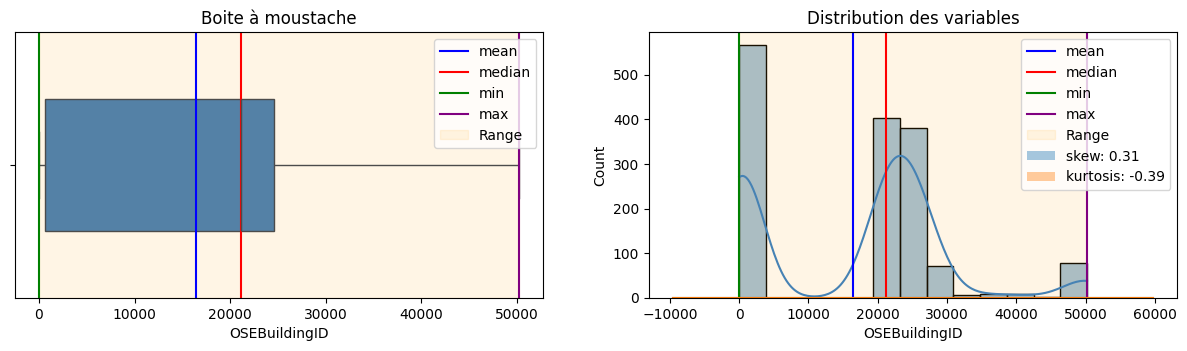

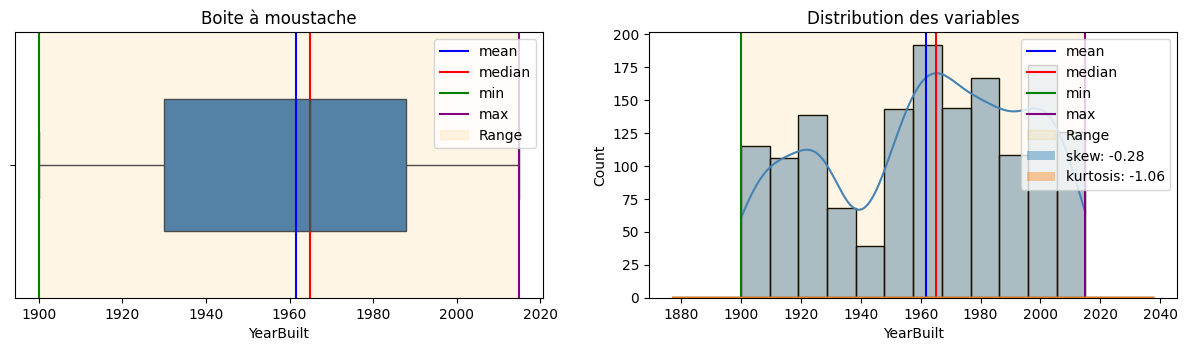

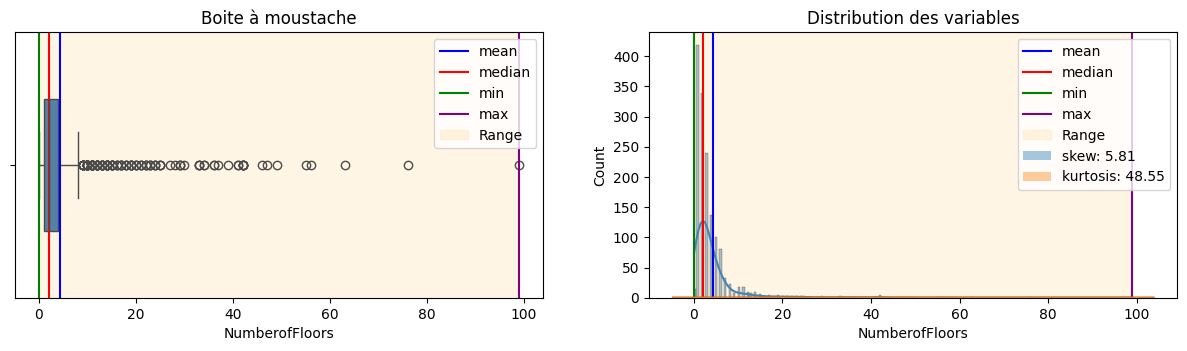

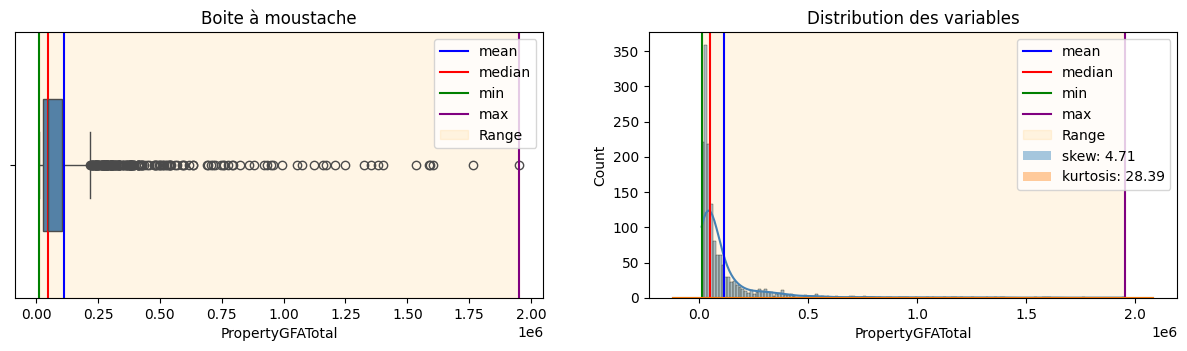

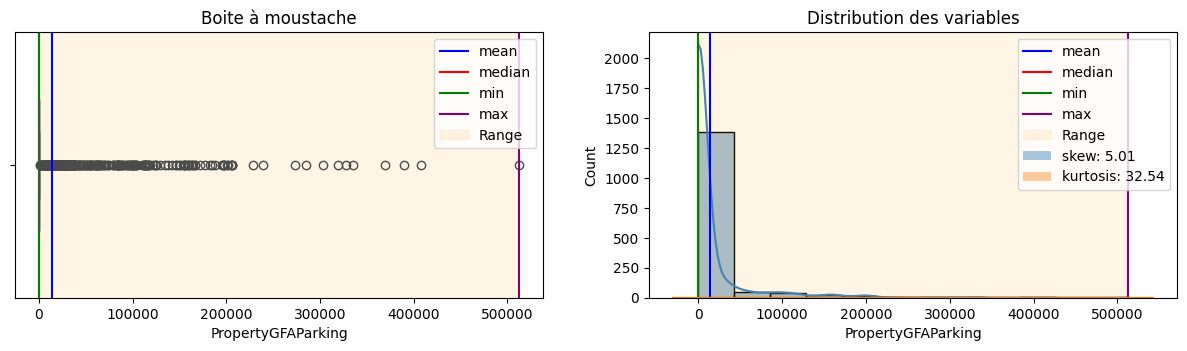

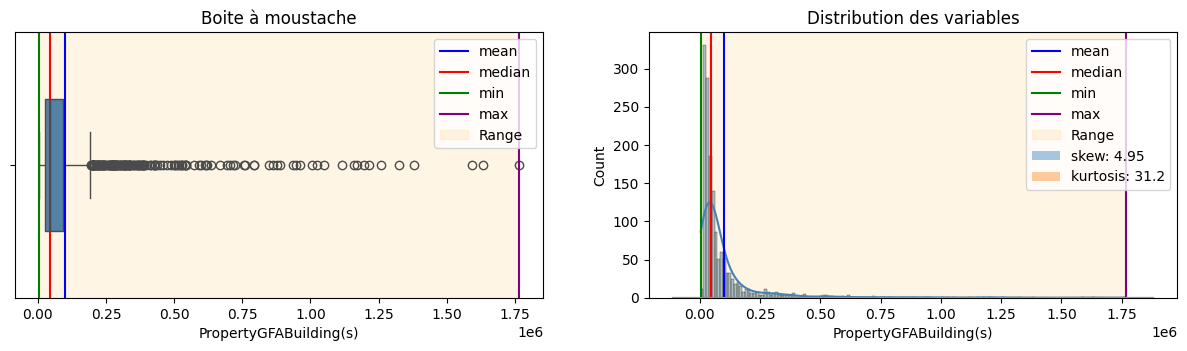

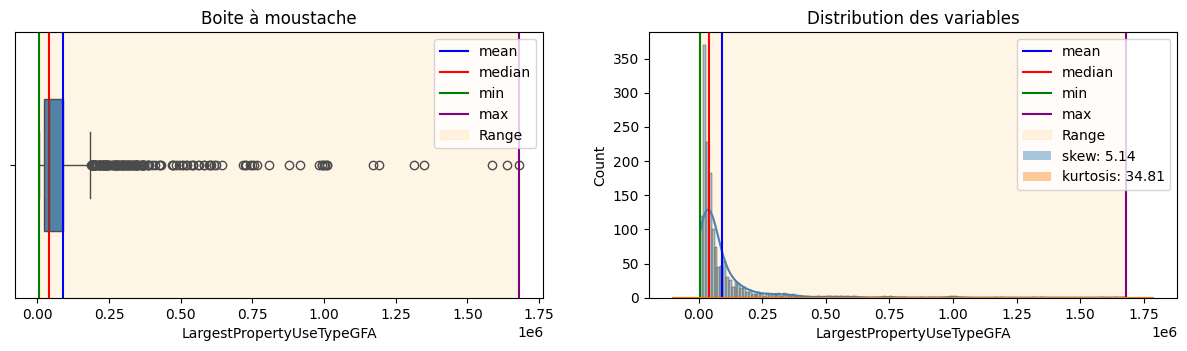

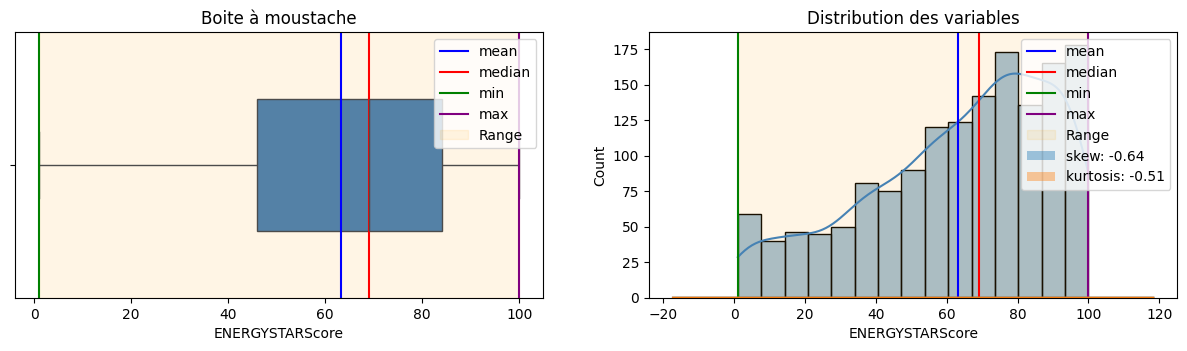

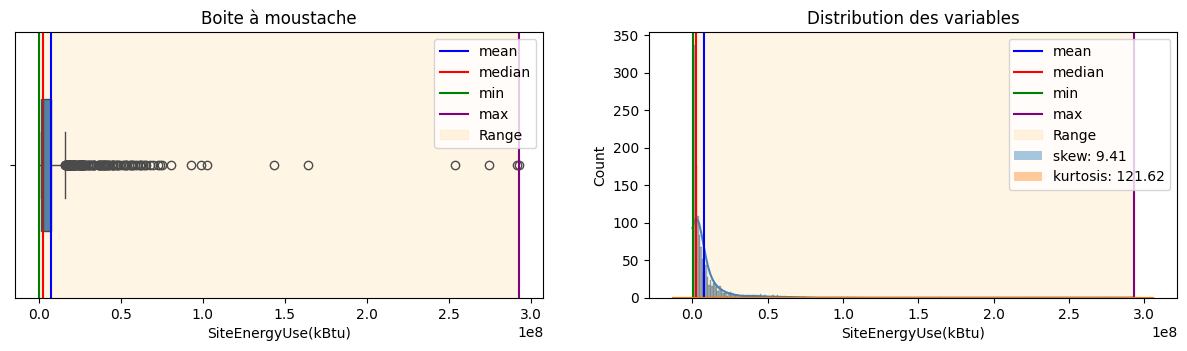

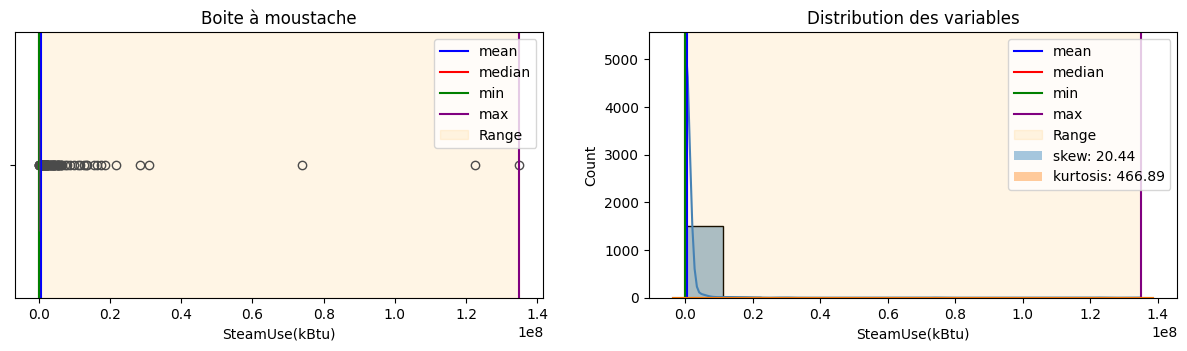

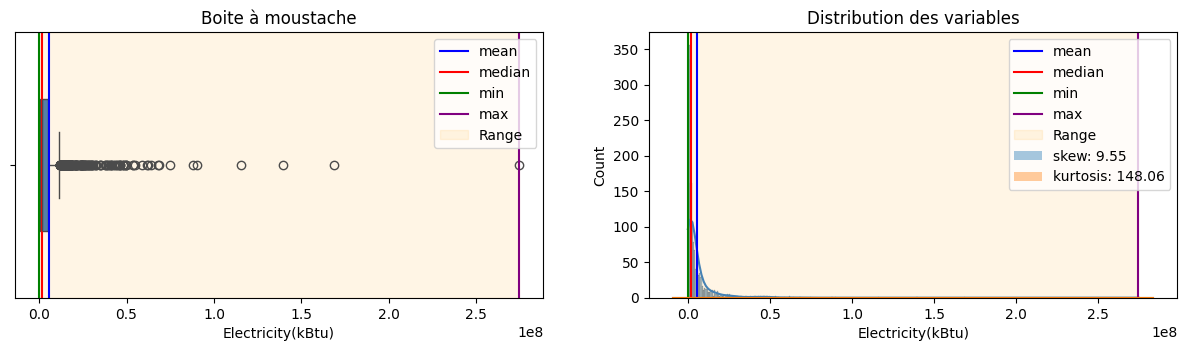

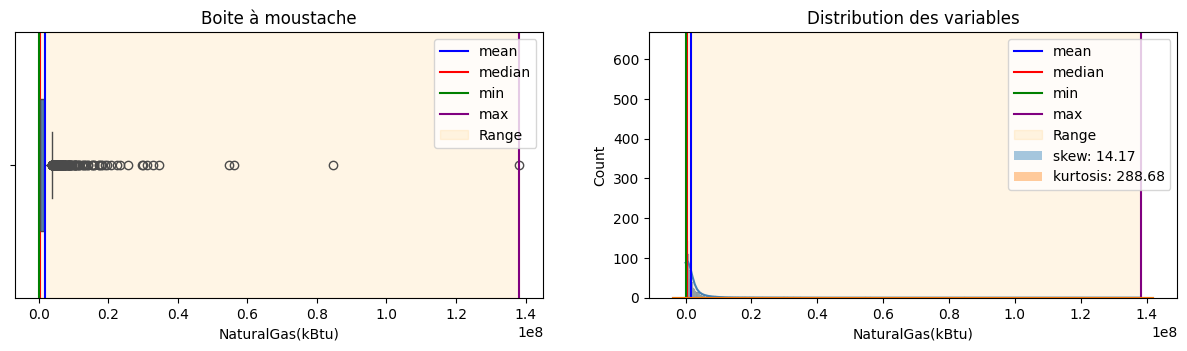

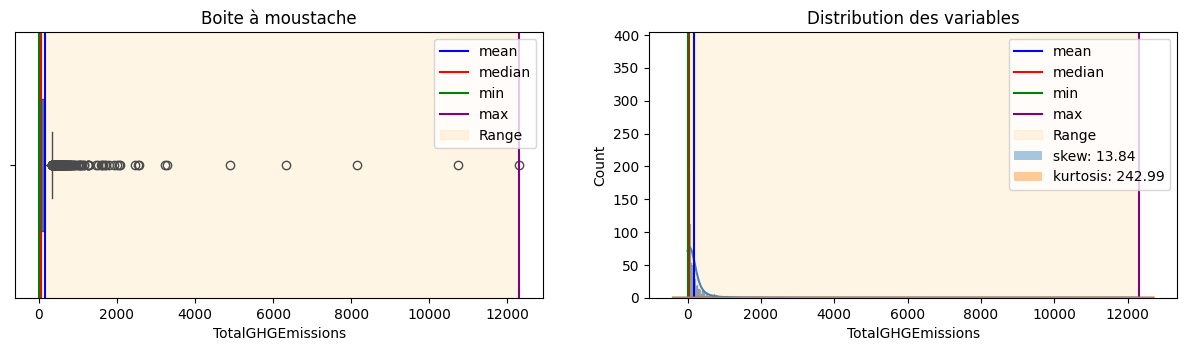

In [17]:
Analyse_Univarie(num_data,num_data.columns)

  # 1.6 Traitement des outliers

In [18]:
#Cette méthode me permet de relever les points de données qui tombe en dehors de 1,5 fois 
#d’une plage interquartile au-dessus du 3e quartile Q3 et en dessous du 1er quartile Q1

def Detection_Outliers_IQR(data,col) :
    Q1= data[col].quantile(0.25)
    Q3= data[col].quantile(0.75)
    IQR= Q3-Q1
    
    indexes_outliers5=[]
    Lower_Bound = Q1 - 1.5*IQR
    Upper_Bound = Q3 + 1.5*IQR
    
    Liste_outliers= data.index[ (data[col]< Lower_Bound) |  (data[col] > Upper_Bound)]
    return print ("Nombre des ouliers de la variable:",'"',col,'"',":",len (Liste_outliers),"outliers\n",Liste_outliers,
                  "\n=============================================================================================\n")

In [19]:
def Identification_Outliers_IQR(data):
    n=0
    for i in data.columns :
        outliers=Detection_Outliers_IQR(data,data.columns[n]) 
        n+=1
    return outliers

In [20]:
Identification_Outliers_IQR(num_data)

Nombre des ouliers de la variable: " OSEBuildingID " : 0 outliers
 Index([], dtype='int64') 

Nombre des ouliers de la variable: " YearBuilt " : 0 outliers
 Index([], dtype='int64') 

Nombre des ouliers de la variable: " NumberofFloors " : 137 outliers
 Index([   0,    1,    2,    3,    4,    6,    8,    9,   10,   11,
       ...
       1418, 1421, 1422, 1448, 1462, 1497, 1498, 1499, 1502, 1503],
      dtype='int64', length=137) 

Nombre des ouliers de la variable: " PropertyGFATotal " : 187 outliers
 Index([   2,   10,   12,   14,   16,   19,   20,   30,   36,   42,
       ...
       1474, 1475, 1481, 1482, 1493, 1497, 1499, 1502, 1503, 1509],
      dtype='int64', length=187) 

Nombre des ouliers de la variable: " PropertyGFAParking " : 328 outliers
 Index([   1,    2,    4,    5,    9,   10,   12,   13,   14,   16,
       ...
       1474, 1475, 1483, 1494, 1499, 1502, 1503, 1504, 1505, 1509],
      dtype='int64', length=328) 

Nombre des ouliers de la variable: " PropertyGFABuilding(

In [21]:
# Fonction qui affiche un récapitulatif des outliers pour les variables quantitatives sous forme d'un tableau
def desc_outliers(df_in):
    val_num = ['int32', 'int64', 'float32', 'float64']
    df_num = df_in.select_dtypes(include=val_num)
    
    print(' ------ Traitement de outliers: liste des colonnes quantitatives à traiter ------')
    print(df_num.columns)
    
    # Création dataframe des récapitulatifs des outliers des nutriments et des scores
    list_index = []
    df_outlier_recap = pd.DataFrame(index=list_index, columns=['Min','Max','Nbre > 0','Nbre < 0'])
    
    for col in df_num.columns:
        list_index.append(col)
        
        # Valeur min
        min = df_in[col].min()
        
        # Valeur max
        max =  df_in[col].max()
        
        # Nombre de valeur < 0
        nbre_inf_0 = df_in[df_in[col] < 0].count()[[col]]
        
        # Nombre valeurs >= 0
        nbre_sup_eq_0 = df_in[df_in[col] >= 0].count()[[col]]
                        
        # Constitution de tableau récapitulatif des outliers
        df_outlier_recap.loc[col] = [min ,max, nbre_sup_eq_0.loc[col], nbre_inf_0.loc[col]]    
           
    
    print('')
    df_recap_outliers = df_outlier_recap
        
    return df_recap_outliers

In [22]:
desc_outliers(data_2016_cleaned)

 ------ Traitement de outliers: liste des colonnes quantitatives à traiter ------
Index(['OSEBuildingID', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions'],
      dtype='object')



Min           Max  Nbre > 0  Nbre < 0
OSEBuildingID                   1.00000  5.022600e+04    1524.0       0.0
YearBuilt                    1900.00000  2.015000e+03    1524.0       0.0
NumberofFloors                  0.00000  9.900000e+01    1524.0       0.0
PropertyGFATotal            11285.00000  1.952220e+06    1524.0       0.0
PropertyGFAParking              0.00000  5.126080e+05    1524.0       0.0
PropertyGFABuilding(s)       3636.00000  1.765970e+06    1524.0       0.0
LargestPropertyUseTypeGFA    5656.00000  1.680937e+06    1524.0       0.0
ENERGYSTARScore                 1.00000  1.000000e+02    1524.0       0.0
SiteEnergyUse(kBtu)         57133.19922  2.930908e+08    1524.0       0.0
SteamUse(kBtu)                  0.00000  1.349435e+08    1524.0       0.0
Electricity(kBtu)         -115417.00000  2.745325e+08    1523.0       1.0
NaturalGas(kBtu)                0.00000  1.381912e+08    1524.0       0.0
TotalGHGEmissions              -0.80000  1.230716e+04    1523.0       1.0

Traitement des outliers:

    suppression des valeurs négatives pour la variable "PropertyGFAParking"
    suppression des valeurs négatives pour la variable "PropertyGFABuilding(s)"



In [23]:
data_2016_cleaned.drop(data_2016_cleaned.loc[data_2016_cleaned['Electricity(kBtu)']<0].index, inplace=True)
data_2016_cleaned.drop(data_2016_cleaned.loc[data_2016_cleaned['TotalGHGEmissions']<0].index, inplace=True)

In [24]:
desc_outliers(data_2016_cleaned)

 ------ Traitement de outliers: liste des colonnes quantitatives à traiter ------
Index(['OSEBuildingID', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions'],
      dtype='object')



Min           Max  Nbre > 0  Nbre < 0
OSEBuildingID                  1.00000  5.022600e+04    1523.0       0.0
YearBuilt                   1900.00000  2.015000e+03    1523.0       0.0
NumberofFloors                 0.00000  9.900000e+01    1523.0       0.0
PropertyGFATotal           11285.00000  1.952220e+06    1523.0       0.0
PropertyGFAParking             0.00000  5.126080e+05    1523.0       0.0
PropertyGFABuilding(s)      3636.00000  1.765970e+06    1523.0       0.0
LargestPropertyUseTypeGFA   5656.00000  1.680937e+06    1523.0       0.0
ENERGYSTARScore                1.00000  1.000000e+02    1523.0       0.0
SiteEnergyUse(kBtu)        57133.19922  2.930908e+08    1523.0       0.0
SteamUse(kBtu)                 0.00000  1.349435e+08    1523.0       0.0
Electricity(kBtu)              0.00000  2.745325e+08    1523.0       0.0
NaturalGas(kBtu)               0.00000  1.381912e+08    1523.0       0.0
TotalGHGEmissions              0.00000  1.230716e+04    1523.0       0.0

# **Partie 2 : Analyse des targets**

 **Targets :**

 - **SiteEnergyUse(kBtu) :** la consommation totale d'énergie
 - **TotalGHGEmissions :** les émissions de CO2
 - **ENERGYSTARScore :** Feature à évaluer

In [25]:
data_2016_cleaned.shape

(1523, 14)

In [26]:
Target_Data_2016 =['SiteEnergyUse(kBtu)','TotalGHGEmissions']
data_2016_cleaned[Target_Data_2016].describe()

SiteEnergyUse(kBtu)  TotalGHGEmissions
count         1.523000e+03        1523.000000
mean          7.724402e+06         167.489009
std           1.874261e+07         574.372965
min           5.713320e+04           0.000000
25%           1.242739e+06          20.235000
50%           2.669564e+06          49.280000
75%           7.211812e+06         142.375000
max           2.930908e+08       12307.160000

# 2.1 Test de normalité 

In [27]:
def Target_log (data,target) :
    
    for column in target :
        data['Log_' +column]=data[column].apply(lambda x : np.log(1 + x))
    return data

In [28]:
Target_log(data_2016_cleaned,Target_Data_2016)

OSEBuildingID PrimaryPropertyType  YearBuilt  NumberofFloors  \
0               1.0               Hotel     1927.0            12.0   
1               2.0               Hotel     1996.0            11.0   
2               3.0               Hotel     1969.0            41.0   
3               5.0               Hotel     1926.0            10.0   
4               8.0               Hotel     1980.0            18.0   
...             ...                 ...        ...             ...   
1519        50221.0               Other     1982.0             1.0   
1520        50223.0               Other     2004.0             1.0   
1521        50224.0               Other     1974.0             1.0   
1522        50225.0  Mixed Use Property     1989.0             1.0   
1523        50226.0  Mixed Use Property     1938.0             1.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0              88434.0                 0.0                 88434.0   
1             103566.0             15064.0                 88502.0   
2             956110.0            196718.0                759392.0   
3              61320.0                 0.0                 61320.0   
4             175580.0             62000.0                113580.0   
...                ...                 ...                     ...   
1519           18261.0                 0.0                 18261.0   
1520           16000.0                 0.0                 16000.0   
1521           13157.0                 0.0                 13157.0   
1522           14101.0                 0.0                 14101.0   
1523           18258.0                 0.0                 18258.0   

      LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
0                       88434.0             60.0         7.226362e+06   
1                       83880.0             61.0         8.387933e+06   
2                      756493.0             43.0         7.258702e+07   
3                       61320.0             56.0         6.794584e+06   
4                      123445.0             75.0         1.417261e+07   
...                         ...              ...                  ...   
1519                    18261.0             60.5         9.320821e+05   
1520                    16000.0             79.0         9.502762e+05   
1521                     7583.0             92.0         5.765898e+06   
1522                     6601.0             56.5         7.194712e+05   
1523                     8271.0             47.5         1.152896e+06   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
0         2003882.00       3.946027e+06      1.276453e+06             249.98   
1               0.00       3.242851e+06      5.145082e+06             295.86   
2        21566554.00       4.952666e+07      1.493800e+06            2089.28   
3         2214446.25       2.768924e+06      1.811213e+06             286.43   
4               0.00       5.368607e+06      8.803998e+06             505.01   
...              ...                ...               ...                ...   
1519            0.00       6.323620e+05      2.997200e+05              20.33   
1520            0.00       3.965461e+05      5.537300e+05              32.17   
1521            0.00       1.792159e+06      3.973739e+06             223.54   
1522            0.00       3.488702e+05      3.706010e+05              22.11   
1523            0.00       4.325542e+05      7.203420e+05              41.27   

      Log_SiteEnergyUse(kBtu)  Log_TotalGHGEmissions  
0                   15.793246               5.525373  
1                   15.942305               5.693261  
2                   18.100297               7.645053  
3                   15.731637               5.660979  
4                   16.466822               6.226556  
...                       ...                    ...  
1519                13.745177               3.060115  
1520                13.764509               3.

In [29]:
def Test_Normalite(data,target) :
#Si la p value des test est inférieur à 5%, on rejette H0 et on conclue que la distribution est non gaussienne(Non Normale).
#Si la p value des test est supérieur à 5%, on accepte H0 et on conclue que la distribution est gaussienne(Normale).

        for column in target :
            print('=================================================================================================')
            print('\n{}:'.format(column))
            k2, p = stats.normaltest(data[column], 
                                     axis=0,
                                     nan_policy = 'omit')
            alpha = 0.05
            print("p = {:g}".format(p))
            if p < alpha:  # null hypothese: x a une distribution normale
                print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
            else:
                print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

In [30]:
Targets = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']
Test_Normalite(data_2016_cleaned,Targets) 


SiteEnergyUse(kBtu):
p = 0
H0 est rejetée : SiteEnergyUse(kBtu) n'est pas de distribution normale

TotalGHGEmissions:
p = 0
H0 est rejetée : TotalGHGEmissions n'est pas de distribution normale


In [31]:
Targets = ['Log_SiteEnergyUse(kBtu)','Log_TotalGHGEmissions']
Test_Normalite(data_2016_cleaned,Targets) 


Log_SiteEnergyUse(kBtu):
p = 2.72985e-06
H0 est rejetée : Log_SiteEnergyUse(kBtu) n'est pas de distribution normale

Log_TotalGHGEmissions:
p = 0.0183412
H0 est rejetée : Log_TotalGHGEmissions n'est pas de distribution normale


 # 2.2 Analyse de la distribution des variables cibles SiteEnergyUse(kBtu) et TotalGHGEmissions.

SiteEnergyUse(kBtu):
Mean:7724402.46
Median:2669564.25
Min:57133.2
Max:293090784.0
Skewness:9.41
Kurtosis:121.56

TotalGHGEmissions:
Mean:167.49
Median:49.28
Min:0.0
Max:12307.16
Skewness:13.84
Kurtosis:242.84



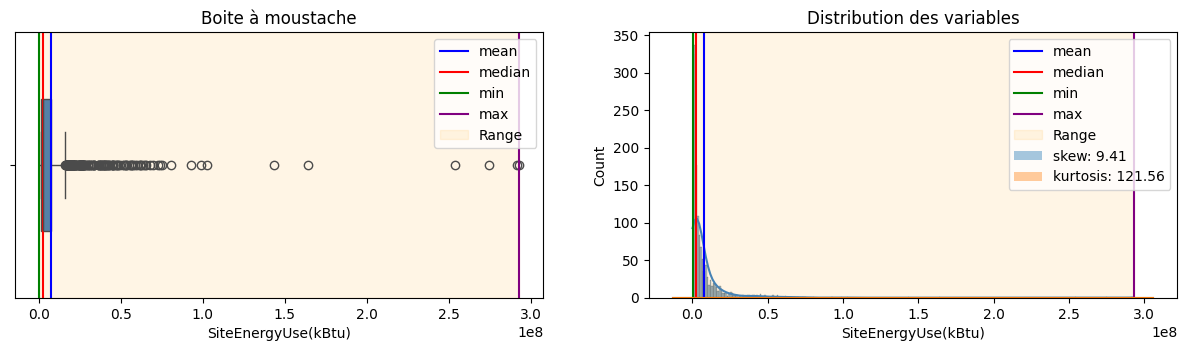

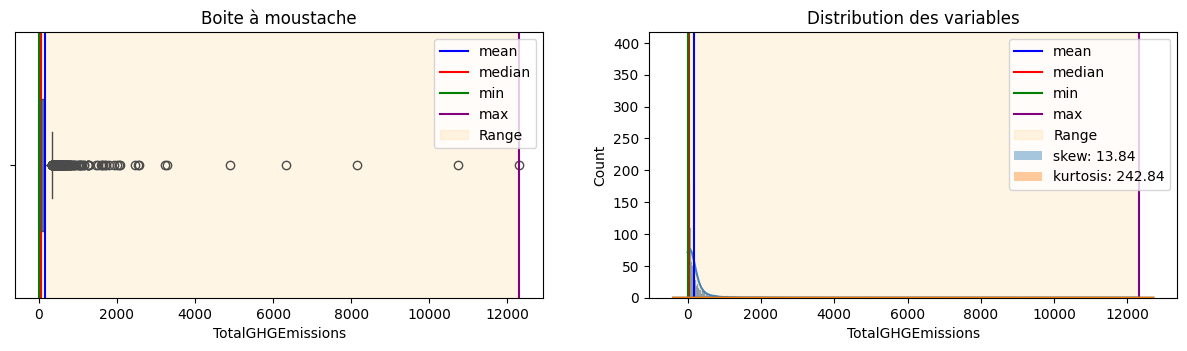

In [32]:
# Taeget
Targets_Col = ["SiteEnergyUse(kBtu)","TotalGHGEmissions"]
Analyse_Univarie(data_2016_cleaned,Targets_Col)

Log_SiteEnergyUse(kBtu):
Mean:14.93
Median:14.8
Min:10.95
Max:19.5
Skewness:0.32
Kurtosis:0.11

Log_TotalGHGEmissions:
Mean:4.0
Median:3.92
Min:0.0
Max:9.42
Skewness:0.17
Kurtosis:0.09



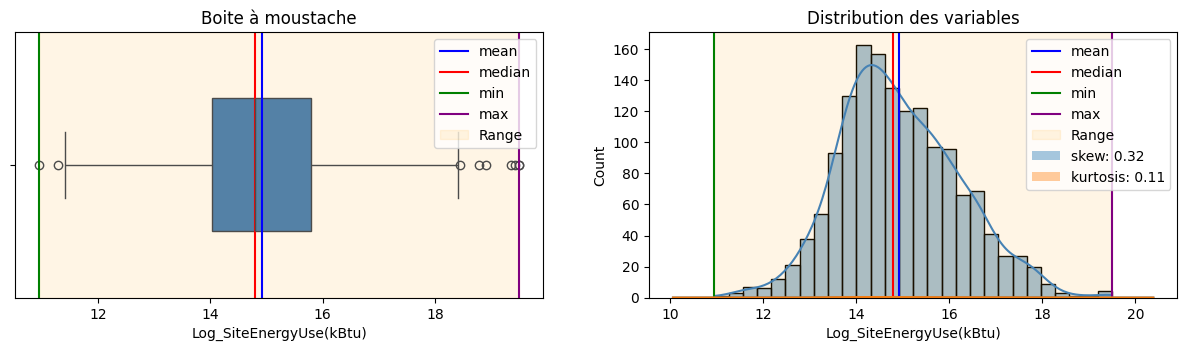

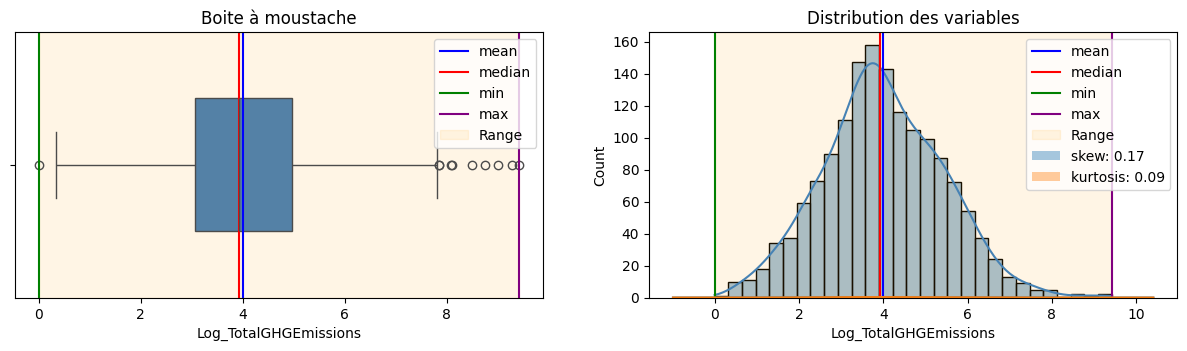

In [33]:
# Taeget LOg
Targets_Col = ["Log_SiteEnergyUse(kBtu)","Log_TotalGHGEmissions"]
Analyse_Univarie(data_2016_cleaned,Targets_Col)

# 2.3 Etude de la corrélation entre différentes variables

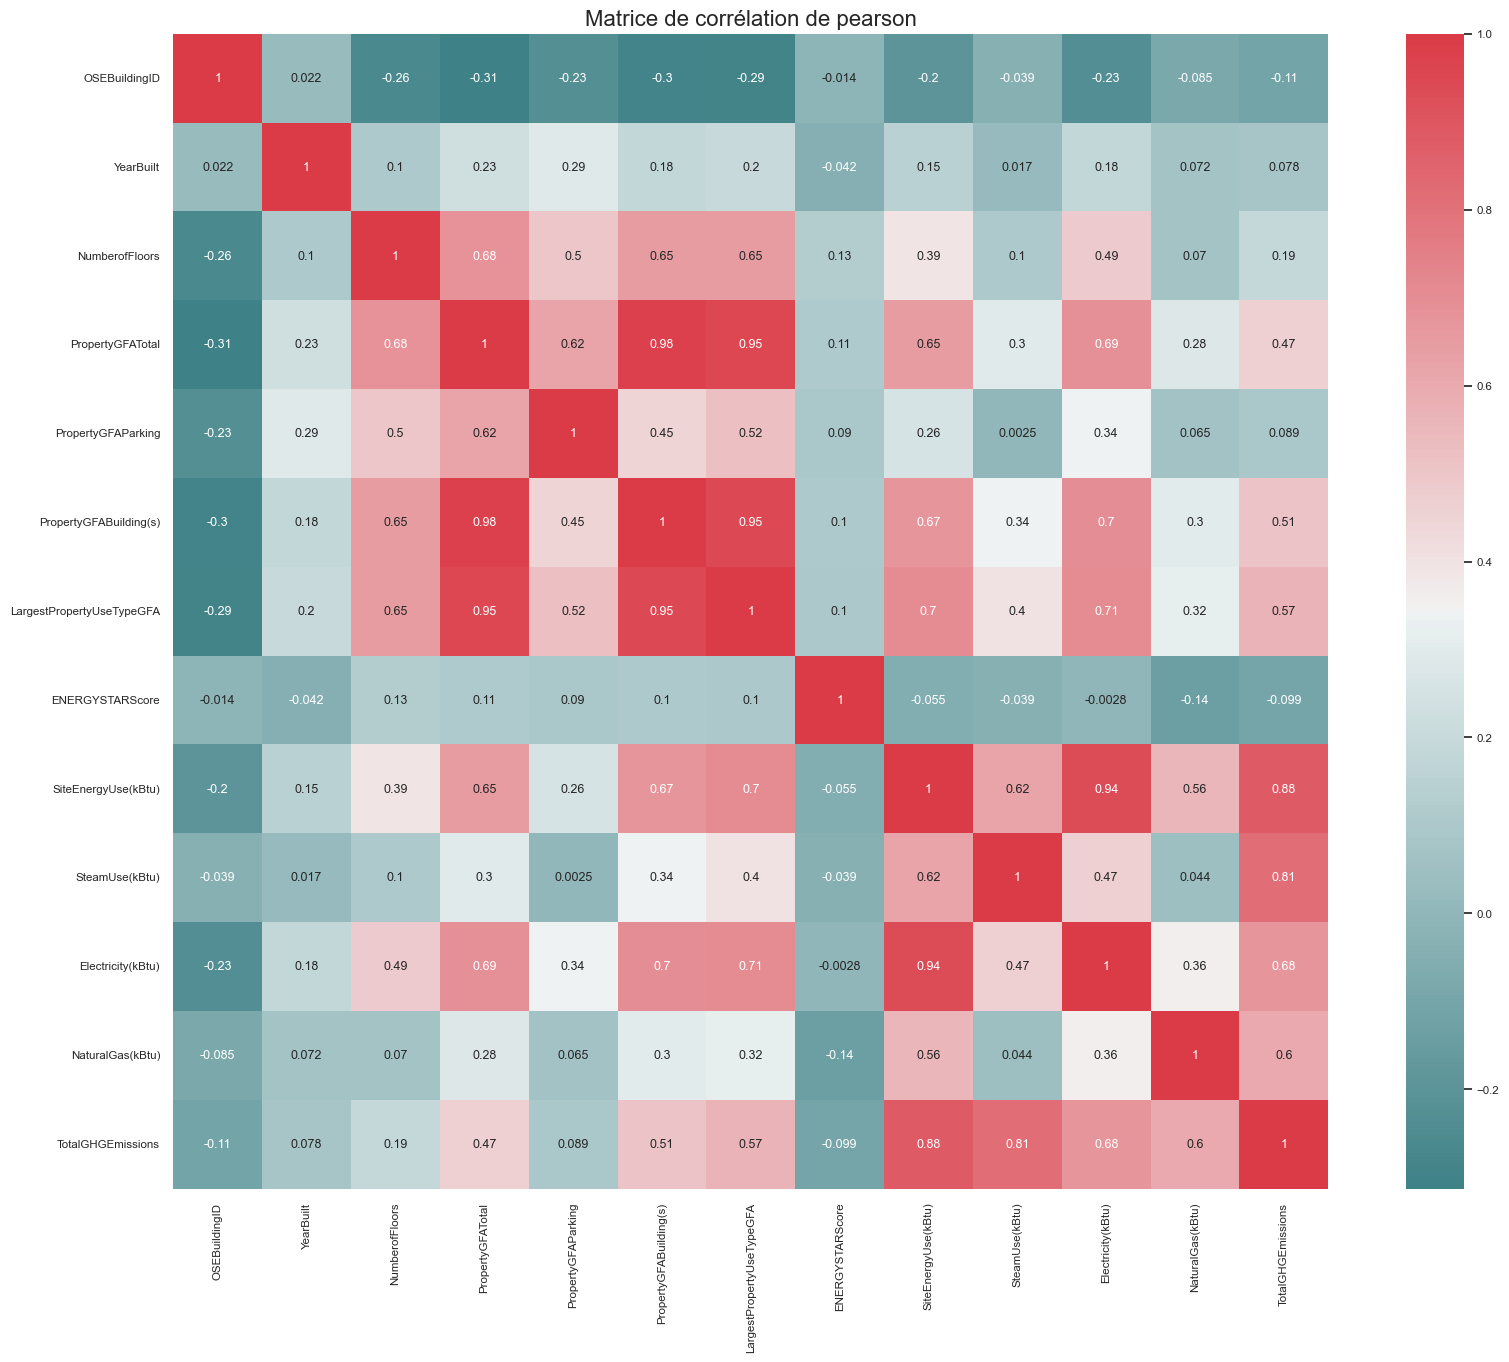

In [34]:
# Répresentation graphique de la matrice de corrélation
sns.set(font_scale=0.75)
fig, ax = plt.subplots(figsize=(20,15)) 
matrice_correlation = np.triu(num_data.corr())

sns.heatmap(num_data.corr(),annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True),
            square=True)
plt.title('Matrice de corrélation de pearson', size=16)
plt.show()

 **Je constate une forte corrélation entre :**
  - **'SiteEnergyUse(kBtu)' et 'Electricity(kBtu)'**
  - **'TotalGHGEmissions' et 'SteamUse(kBtu)'**
  - **"PropertyGFAParking" et "PropertyGFATotal"**
  - **"LargestPropertyUseTypeGFA" et "PropertyGFATotal"**
  - **"LargestPropertyUseTypeGFA" et 'PropertyGFABuilding(s)'**
  
    

- Pour eviter un data leakage ,je supprimerai les variables :
     - Fortement correlées à notre variable cible 
     - **LargestPropertyUseTypeGFA" et 'PropertyGFABuilding(s)** et je garderai que **'PropertyGFATotal'**.
 - **Une corrélation élevée entre deux variables, peut biaiser les prévisions**

- **Ces variables seront supprimées dans la partie "Feature engineering"**

- **GFA :** Elle représente la surface au sol (Ground Floor Area).

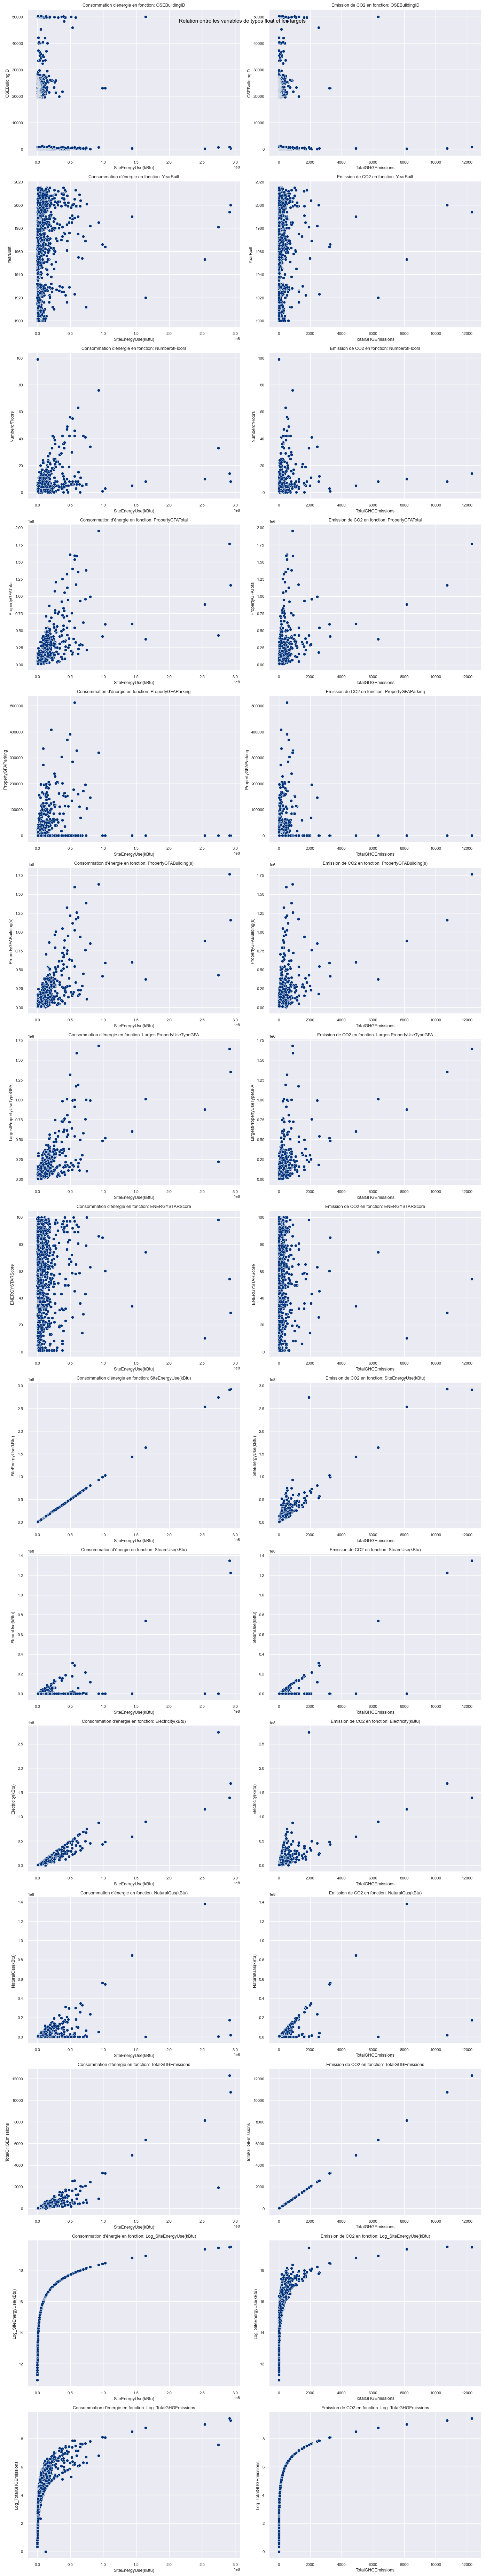

In [35]:
# Define number of subplots per line
n_plots_per_row = 2

# Create a figure with several subplots
fig, axes = plt.subplots(nrows=len(data_2016_cleaned.select_dtypes("float").columns), ncols=n_plots_per_row, figsize=(14, 5*len(data_2016_cleaned.select_dtypes("float").columns)))
# Add a unique title for each target
plt.suptitle(f"Relation entre les variables de types float et les targets\n\n\n\n", color="#000")

# Browse each 'object' column
for i, col in enumerate(data_2016_cleaned.select_dtypes("float").columns):
    # Colour palette for the various graphics
    #palette_map = sns.color_palette("dark:#00317a", n_colors=df_clean[col].nunique(),as_cmap=False)
    # Create a bar graph in the left subplot
    ax = axes[i, 0]
    sns.scatterplot(x='SiteEnergyUse(kBtu)', y=col, data=data_2016_cleaned, ax=ax, color="#00317a")
    ax.set_title(f'Consommation d\'énergie en fonction: {col}')  # Ajoute un titre au graphique

    # Create a bar graph in the right subplot
    ax = axes[i, 1]
    sns.scatterplot(x='TotalGHGEmissions', y=col, data=data_2016_cleaned, ax=ax, color="#00317a")
    ax.set_title(f'Emission de CO2 en fonction: {col}')  # Ajoute un titre au graphique

# Display figure
plt.tight_layout()  # Ajuster automatiquement les marges pour éviter que les subplots se chevauchent

 # 2.4 Supprime les bâtiments qui n'ont pas de donnée de consommation

In [36]:
data_2016_cleaned.shape

(1523, 16)

In [37]:
#Supprime les bâtiments qui n'ont pas de donnée de consommation
data_2016_cleaned = data_2016_cleaned[data_2016_cleaned["SiteEnergyUse(kBtu)"].notnull()]

In [38]:
data_2016_cleaned.shape

(1523, 16)

In [39]:
#Pourcentage des données manquantes
def Taux_Data_Manquantes (data) :
    return print('Taux des données manquantes est : ',round(data.isna().mean().mean()*100,2),'%')

In [40]:
Taux_Data_Manquantes(data_2016_cleaned["TotalGHGEmissions"])

Taux des données manquantes est :  0.0 %


# **Partie 3 : Feature engineering**

# 3.1 L'age des batimants :

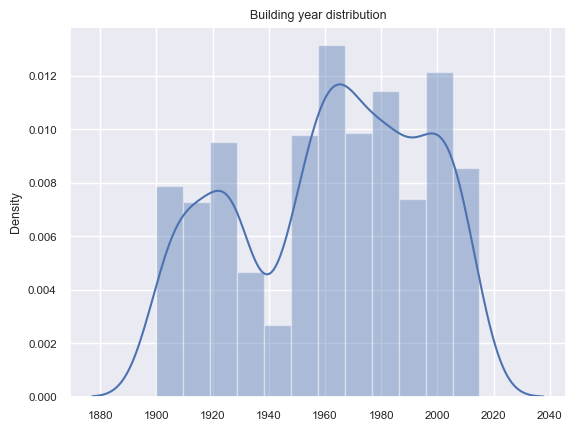

In [41]:
sns.distplot(x=data_2016_cleaned["YearBuilt"])
plt.title("Building year distribution")
plt.show()

In [42]:
data_2016_cleaned["BuildingAge"] = 2016 - data_2016_cleaned['YearBuilt']
data_2016_cleaned[["YearBuilt","BuildingAge"]]

YearBuilt  BuildingAge
0        1927.0         89.0
1        1996.0         20.0
2        1969.0         47.0
3        1926.0         90.0
4        1980.0         36.0
...         ...          ...
1519     1982.0         34.0
1520     2004.0         12.0
1521     1974.0         42.0
1522     1989.0         27.0
1523     1938.0         78.0

[1523 rows x 2 columns]

'BuildingAge':
Mean:54.38
Median:51.0
Min:1.0
Max:116.0
Skewness:0.28
Kurtosis:-1.06



<Axes: xlabel='BuildingAge'>

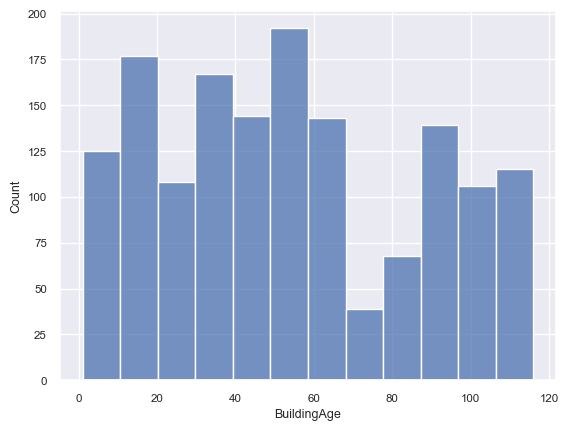

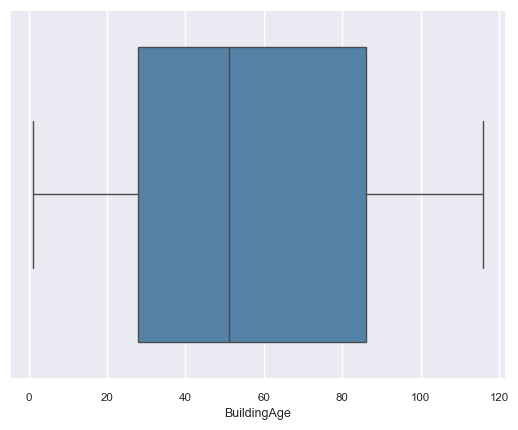

In [43]:
Mean = round(data_2016_cleaned['BuildingAge'].mean(), 2)
Median = round(data_2016_cleaned['BuildingAge'].median(), 2)
Min = round(data_2016_cleaned['BuildingAge'].min(), 2)
Max = round(data_2016_cleaned['BuildingAge'].max(), 2) 
Skewness = round(data_2016_cleaned['BuildingAge'].skew(), 2)
Kurtosis = round(data_2016_cleaned['BuildingAge'].kurtosis(), 2)
print(f"'BuildingAge':\nMean:{Mean}\nMedian:{Median}\nMin:{Min}\nMax:{Max}\nSkewness:{Skewness}\nKurtosis:{Kurtosis}\n")
print("========================================================================================================")
#On supprime les colonnes qui ne nous servent plus
data_2016_cleaned.drop(["YearBuilt"], axis=1, inplace=True)
plt.figure()
sns.histplot(data_2016_cleaned['BuildingAge'])
plt.figure()
sns.boxplot(data_2016_cleaned['BuildingAge'],color='SteelBlue',orient="h")

In [44]:
data_2016_cleaned['BuildingAge'].describe()

count    1523.000000
mean       54.380827
std        32.823615
min         1.000000
25%        28.000000
50%        51.000000
75%        86.000000
max       116.000000
Name: BuildingAge, dtype: float64

In [45]:
data_2016_cleaned.shape

(1523, 16)

# 3.2 Surface réelle par bâtiment

Création d'une variable Surface réelle

Dans le but de simplifier les modèles nous allons scinder plusieurs variables comprenants des informations physiques des bâtiments.

Cette nouvelle variable "Surface_Reelle" est une formule de surface pour chaque observation :

  - Le nombre de niveaux
  - La surface totale au sol des batiments

La variable numberofFloors représente le nombre de niveaux et non d'étages. Pour avoir le nombre d'étage il faut rajouter le rez-de-chaussée dans la formule.

Ainsi, au lieu d'avoir 2 features pour chaque observation, nous n'en aurons plus qu'une.

In [46]:
def Create_var(df):
    
    #On crée une variable nombre d'étages qui est le nombre de niveaux + le rez de chaussée
    df["Nbr_etages"] = 1
    df["Nbr_etages"] = df["NumberofFloors"] + df["Nbr_etages"]
    
    #On calcule la surface réelle d'une observation
    df["Surface_reelle"] = df["Nbr_etages"] * df["PropertyGFABuilding(s)"]
    
    #On supprime les colonnes qui ne nous servent plus
    df.drop(["NumberofFloors","Nbr_etages"], axis=1, inplace=True)    
    return df

In [47]:
Create_var(data_2016_cleaned)

OSEBuildingID PrimaryPropertyType  PropertyGFATotal  PropertyGFAParking  \
0               1.0               Hotel           88434.0                 0.0   
1               2.0               Hotel          103566.0             15064.0   
2               3.0               Hotel          956110.0            196718.0   
3               5.0               Hotel           61320.0                 0.0   
4               8.0               Hotel          175580.0             62000.0   
...             ...                 ...               ...                 ...   
1519        50221.0               Other           18261.0                 0.0   
1520        50223.0               Other           16000.0                 0.0   
1521        50224.0               Other           13157.0                 0.0   
1522        50225.0  Mixed Use Property           14101.0                 0.0   
1523        50226.0  Mixed Use Property           18258.0                 0.0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  ENERGYSTARScore  \
0                    88434.0                    88434.0             60.0   
1                    88502.0                    83880.0             61.0   
2                   759392.0                   756493.0             43.0   
3                    61320.0                    61320.0             56.0   
4                   113580.0                   123445.0             75.0   
...                      ...                        ...              ...   
1519                 18261.0                    18261.0             60.5   
1520                 16000.0                    16000.0             79.0   
1521                 13157.0                     7583.0             92.0   
1522                 14101.0                     6601.0             56.5   
1523                 18258.0                     8271.0             47.5   

      SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
0            7.226362e+06      2003882.00       3.946027e+06   
1            8.387933e+06            0.00       3.242851e+06   
2            7.258702e+07     21566554.00       4.952666e+07   
3            6.794584e+06      2214446.25       2.768924e+06   
4            1.417261e+07            0.00       5.368607e+06   
...                   ...             ...                ...   
1519         9.320821e+05            0.00       6.323620e+05   
1520         9.502762e+05            0.00       3.965461e+05   
1521         5.765898e+06            0.00       1.792159e+06   
1522         7.194712e+05            0.00       3.488702e+05   
1523         1.152896e+06            0.00       4.325542e+05   

      NaturalGas(kBtu)  TotalGHGEmissions  Log_SiteEnergyUse(kBtu)  \
0         1.276453e+06             249.98                15.793246   
1         5.145082e+06             295.86                15.942305   
2         1.493800e+06            2089.28                18.100297   
3         1.811213e+06             286.43                15.731637   
4         8.803998e+06             505.01                16.466822   
...                ...                ...                      ...   
1519      2.997200e+05              20.33                13.745177   
1520      5.537300e+05              32.17                13.764509   
1521      3.973739e+06             223.54                15.567472   
1522      3.706010e+05              22.11                13.486273   
1523      7.203420e+05              41.27                13.957789   

      Log_TotalGHGEmissions  BuildingAge  Surface_reelle  
0                  5.525373         89.0       1149642.0  
1                  5.693261         20.0       1062024.0  
2                  7.645053         47.0      31894464.0  
3                  5.660979         90.0        674520.0  
4                  6.226556         36.0       2158020.0  
...                     ...          ...             ...  
1519               3.060115         34.0         36522.0  
1520               3.501646         12

In [48]:
data_2016_cleaned.shape

(1523, 16)

In [49]:
data_2016_cleaned[["PropertyGFAParking",'PropertyGFABuilding(s)',"PropertyGFATotal"]].head(10)



PropertyGFAParking  PropertyGFABuilding(s)  PropertyGFATotal
0                 0.0                 88434.0           88434.0
1             15064.0                 88502.0          103566.0
2            196718.0                759392.0          956110.0
3                 0.0                 61320.0           61320.0
4             62000.0                113580.0          175580.0
5             37198.0                 60090.0           97288.0
6                 0.0                 83008.0           83008.0
7                 0.0                102761.0          102761.0
8                 0.0                163984.0          163984.0
9             19279.0                133884.0          153163.0

- **En additionnant les 2 variables "PropertyGFAParking" et 'PropertyGFABuilding',on constate que la somme correspond aux données de la variable "PropertyGFATotal"**

- **Je ne vais pas les garder "PropertyGFAParking" et 'PropertyGFABuilding dans mon dataset pour la prédiction des targets, car ils risquent de fausser les scores.**

In [50]:
data_2016_cleaned.drop(columns=['PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA'] , inplace=True)

 # 3.3 Type d'énergie utilisée dans les bâtiments

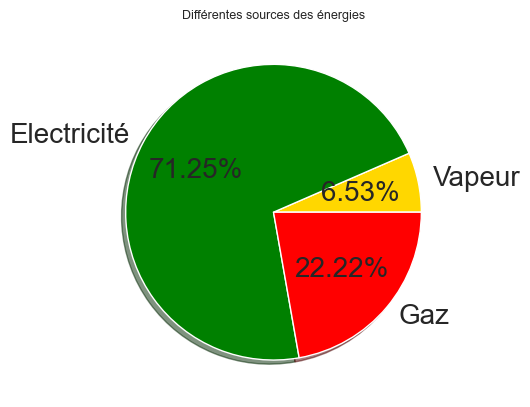

In [51]:
somme_vap   =  data_2016_cleaned["SteamUse(kBtu)"].sum()
somme_elec  =  data_2016_cleaned["Electricity(kBtu)"].sum()
somme_gaz   =  data_2016_cleaned["NaturalGas(kBtu)"].sum()
somme_total =  data_2016_cleaned["SiteEnergyUse(kBtu)"].sum()

Pourc_vap =somme_vap/somme_total
Pourc_elc= somme_elec/somme_total
Pourc_gaz=  somme_gaz/somme_total

plt.title("Différentes sources des énergies")
plt.pie([Pourc_vap,Pourc_elc,Pourc_gaz], labels = ["Vapeur","Electricité","Gaz"], autopct='%.2f%%', colors = ['gold', 'green','red'], shadow=True, textprops={'fontsize': 20})
plt.show()

In [52]:
data_2016_cleaned[['SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)','SiteEnergyUse(kBtu)']]

SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  SiteEnergyUse(kBtu)
0         2003882.00       3.946027e+06      1.276453e+06         7.226362e+06
1               0.00       3.242851e+06      5.145082e+06         8.387933e+06
2        21566554.00       4.952666e+07      1.493800e+06         7.258702e+07
3         2214446.25       2.768924e+06      1.811213e+06         6.794584e+06
4               0.00       5.368607e+06      8.803998e+06         1.417261e+07
...              ...                ...               ...                  ...
1519            0.00       6.323620e+05      2.997200e+05         9.320821e+05
1520            0.00       3.965461e+05      5.537300e+05         9.502762e+05
1521            0.00       1.792159e+06      3.973739e+06         5.765898e+06
1522            0.00       3.488702e+05      3.706010e+05         7.194712e+05
1523            0.00       4.325542e+05      7.203420e+05         1.152896e+06

[1523 rows x 4 columns]

- **En additionnant les 3 variables ("SteamUse(kBtu)", "Electricity(kBtu)" et "NaturalGas(kBtu)"), on constate que la somme correspond aux données de la variable "SiteEnergyUse(kBtu)"**

- **Je ne vais pas les garder dans mon dataset pour la prédiction des targets, car ils risquent de fausser les scores.**


- **'NaturalGas_Use':** (0/1) variable binaire qui indique si un bâtiment utilise le gaz ou pas comme énergie
- **'Electricity_Use':** (0/1) variable binaire qui indique si un bâtiment utilise l'électricité ou pas comme énergie
- **'SteamUse_Use':** (0/1) variable binaire qui indique si un bâtiment utilise la vapeur ou pas comme énergie

In [53]:
data_2016_cleaned['NaturalGas_use'] = (data_2016_cleaned['NaturalGas(kBtu)']>1).replace({True: 1, False: 0})
data_2016_cleaned['Electricity_use'] = (data_2016_cleaned['Electricity(kBtu)']>1).replace({True: 1, False: 0})
data_2016_cleaned['Steam_use'] = (data_2016_cleaned['SteamUse(kBtu)']>1).replace({True: 1, False: 0})

In [54]:
data_2016_cleaned.shape

(1523, 16)

In [55]:
data_2016_cleaned.drop(columns=['NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)'] , inplace=True)

In [56]:
data_2016_cleaned.shape

(1523, 13)

In [57]:
fig = px.box(data_2016_cleaned, x='Electricity_use', y="SiteEnergyUse(kBtu)")
fig.show()

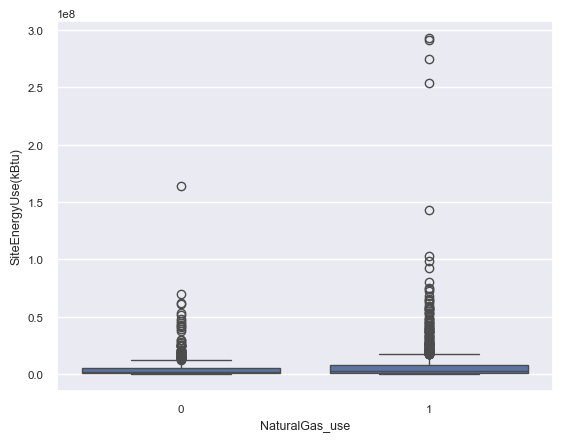

In [58]:
sns.boxplot(data_2016_cleaned,x='NaturalGas_use', y="SiteEnergyUse(kBtu)")
plt.show()

In [59]:
fig = px.box(data_2016_cleaned, x='Steam_use', y="SiteEnergyUse(kBtu)")
fig.show()

# **Parie 4 : Analyse des variables**

# 4.2 Les bâtiments à très grande consommation énergétique

In [60]:
data_2016_cleaned.sort_values('SiteEnergyUse(kBtu)', ascending=False, inplace=True)
data_2016_cleaned[['PrimaryPropertyType','SiteEnergyUse(kBtu)']].head(20)

PrimaryPropertyType  SiteEnergyUse(kBtu)
129             Hospital          293090784.0
548             Hospital          291614432.0
490                Other          274682208.0
101             Hospital          253832464.0
1482            Hospital          163945984.0
127             Hospital          143423024.0
965       Medical Office          102673696.0
962             Hospital           98960776.0
491         Large Office           92937640.0
42                 Hotel           80469216.0
250   Mixed Use Property           75073888.0
414         Large Office           74130576.0
2                  Hotel           72587024.0
176         Large Office           69519808.0
83              Hospital           68090728.0
96                 Other           65336980.0
126                Hotel           65047284.0
411   Mixed Use Property           63835192.0
138                Other           62197176.0
270                Other           61762380.0

- **La catégorie "Hospital" est celle qui consomme le plus d'énergie**

In [61]:
data_2016_cleaned.set_index('OSEBuildingID', drop=True, inplace=True)

In [62]:
data_2016_cleaned

PrimaryPropertyType  PropertyGFATotal  ENERGYSTARScore  \
OSEBuildingID                                                             
276.0                       Hospital         1158691.0             29.0   
828.0                       Hospital         1765970.0             54.0   
753.0                          Other          429405.0             98.0   
198.0                       Hospital          879000.0             10.0   
49940.0                     Hospital          374466.0             74.0   
...                              ...               ...              ...   
24778.0                    Warehouse           24617.0             74.0   
22547.0        Self-Storage Facility           30989.0             74.0   
20396.0                    Warehouse           33300.0             74.0   
27869.0                    Warehouse           23040.0             99.0   
22548.0        Self-Storage Facility           39952.0             99.5   

               SiteEnergyUse(kBtu)  TotalGHGEmissions  \
OSEBuildingID                                           
276.0                 2.930908e+08           10734.57   
828.0                 2.916144e+08           12307.16   
753.0                 2.746822e+08            1921.82   
198.0                 2.538325e+08            8145.52   
49940.0               1.639460e+08            6330.91   
...                            ...                ...   
24778.0               1.069180e+05               0.75   
22547.0               9.769040e+04               0.68   
20396.0               9.055870e+04               0.63   
27869.0               7.971180e+04               0.87   
22548.0               5.713320e+04               0.40   

               Log_SiteEnergyUse(kBtu)  Log_TotalGHGEmissions  BuildingAge  \
OSEBuildingID                                                                
276.0                        19.495993               9.281318         16.0   
828.0                        19.490943               9.418018         22.0   
753.0                        19.431125               7.561548         35.0   
198.0                        19.352185               9.005346         63.0   
49940.0                      18.915048               8.753357         96.0   
...                                ...                    ...          ...   
24778.0                      11.579827               0.559616         84.0   
22547.0                      11.489569               0.518794         36.0   
20396.0                      11.413765               0.488580        116.0   
27869.0                      11.286185               0.625938         96.0   
22548.0                      10.953158               0.336472        101.0   

               Surface_reelle  NaturalGas_use  Electricity_use  Steam_use  
OSEBuildingID                                                              
276.0              10428219.0               1                1          1  
828.0              26489550.0               1                1          1  
753.0              14599770.0               1                1          0  
198.0               9669000.0               1                1          0  
49940.0             3370194.0               0                1          1  
...                       ...             ...              ...        ...  
24778.0               49234.0               0                1          0  
22547.0              123956.0               0                1          0  
20396.0              199800.0               0                1          0  
27869.0               69120.0               1                1          0  
22548.0              159808.0               0                1          0  

[1523 rows x 12 columns]

In [63]:
cat_data1 =[]
num_data1=[]

for i,n in enumerate (data_2016_cleaned.dtypes):
  if n==object :
     cat_data1.append(data_2016_cleaned.iloc[:,i])
  else :
     num_data1.append(data_2016_cleaned.iloc[:,i])

In [64]:
#Liste des variables quantitatives
num_data1=pd.DataFrame(num_data1).T
print ("Nombre de variable quantitatives :",len(num_data1.columns))
num_data1.columns

Nombre de variable quantitatives : 11


Index(['PropertyGFATotal', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'Log_SiteEnergyUse(kBtu)', 'Log_TotalGHGEmissions',
       'BuildingAge', 'Surface_reelle', 'NaturalGas_use', 'Electricity_use',
       'Steam_use'],
      dtype='object')

# 4.3 Etude de corrélation entre Targets/Features

<Axes: >

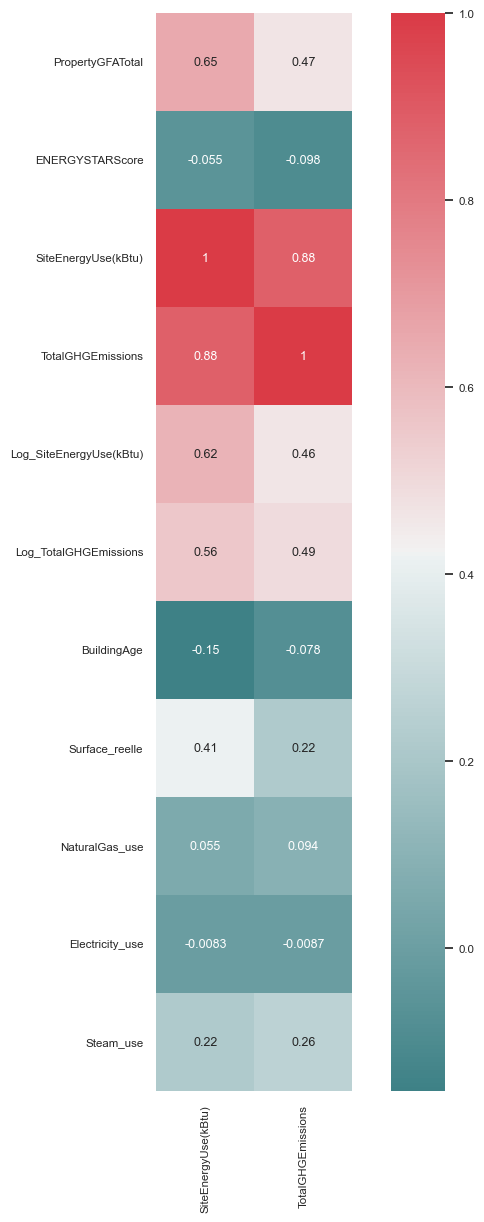

In [65]:
targets = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']

# Compute the correlation matrix
corr = num_data1.corr()
corr1 = corr.loc[:, targets]
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr1, dtype=bool))

# Set up the matplotlib figure
fig = plt.figure(1, figsize=(10, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0.1,
           # square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5});


sns.heatmap(corr1,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True),
            square=True)

In [66]:
corr

PropertyGFATotal  ENERGYSTARScore  \
PropertyGFATotal                 1.000000         0.111882   
ENERGYSTARScore                  0.111882         1.000000   
SiteEnergyUse(kBtu)              0.649538        -0.055173   
TotalGHGEmissions                0.465011        -0.098387   
Log_SiteEnergyUse(kBtu)          0.617044        -0.176396   
Log_TotalGHGEmissions            0.489897        -0.169417   
BuildingAge                     -0.229063         0.043306   
Surface_reelle                   0.780073         0.103237   
NaturalGas_use                   0.003499        -0.028588   
Electricity_use                  0.011850         0.047667   
Steam_use                        0.214275         0.032365   

                         SiteEnergyUse(kBtu)  TotalGHGEmissions  \
PropertyGFATotal                    0.649538           0.465011   
ENERGYSTARScore                    -0.055173          -0.098387   
SiteEnergyUse(kBtu)                 1.000000           0.881735   
TotalGHGEmissions                   0.881735           1.000000   
Log_SiteEnergyUse(kBtu)             0.619308           0.462687   
Log_TotalGHGEmissions               0.556217           0.494556   
BuildingAge                        -0.152892          -0.077889   
Surface_reelle                      0.414937           0.218363   
NaturalGas_use                      0.055027           0.094399   
Electricity_use                    -0.008307          -0.008722   
Steam_use                           0.216433           0.259334   

                         Log_SiteEnergyUse(kBtu)  Log_TotalGHGEmissions  \
PropertyGFATotal                        0.617044               0.489897   
ENERGYSTARScore                        -0.176396              -0.169417   
SiteEnergyUse(kBtu)                     0.619308               0.556217   
TotalGHGEmissions                       0.462687               0.494556   
Log_SiteEnergyUse(kBtu)                 1.000000               0.883430   
Log_TotalGHGEmissions                   0.883430               1.000000   
BuildingAge                            -0.271423              -0.162019   
Surface_reelle                          0.353261               0.266096   
NaturalGas_use                          0.120158               0.416388   
Electricity_use                        -0.038652               0.020077   
Steam_use                               0.244996               0.320064   

                         BuildingAge  Surface_reelle  NaturalGas_use  \
PropertyGFATotal           -0.229063        0.780073        0.003499   
ENERGYSTARScore             0.043306        0.103237       -0.028588   
SiteEnergyUse(kBtu)        -0.152892        0.414937        0.055027   
TotalGHGEmissions          -0.077889        0.218363        0.094399   
Log_SiteEnergyUse(kBtu)    -0.271423        0.353261        0.120158   
Log_TotalGHGEmissions      -0.162019        0.266096        0.416388   
BuildingAge                 1.000000       -0.112807        0.029472   
Surface_reelle             -0.112807        1.000000       -0.003372   
NaturalGas_use              0.029472       -0.003372        1.000000   
Electricity_use            -0.008420        0.006859        0.016888   
Steam_use                   0.123923        0.165351       -0.096370   

                         Electricity_use  Steam_use  
PropertyGFATotal                0.011850   0.214275  
ENERGYSTARScore                 0.047667   0.032365  
SiteEnergyUse(kBtu)            -0.008307   0.216433  
TotalGHGEmissions              -0.008722   0.259334  
Log_SiteEnergyUse(kBtu)        -0.038652   0.244996  
Log_TotalGHGEmissions           0.020077   0.320064  
BuildingAge                    -0.008420   0.123923  
Surface_reelle                  0.006859   0.165351  
NaturalGas_use                  0.016888  -0.096370  
Electricity_use                 1.000000   0.010118  
Steam_use                       0.010118   1.000000

# 4.4 Etude de corrélation entre Feature/Feature

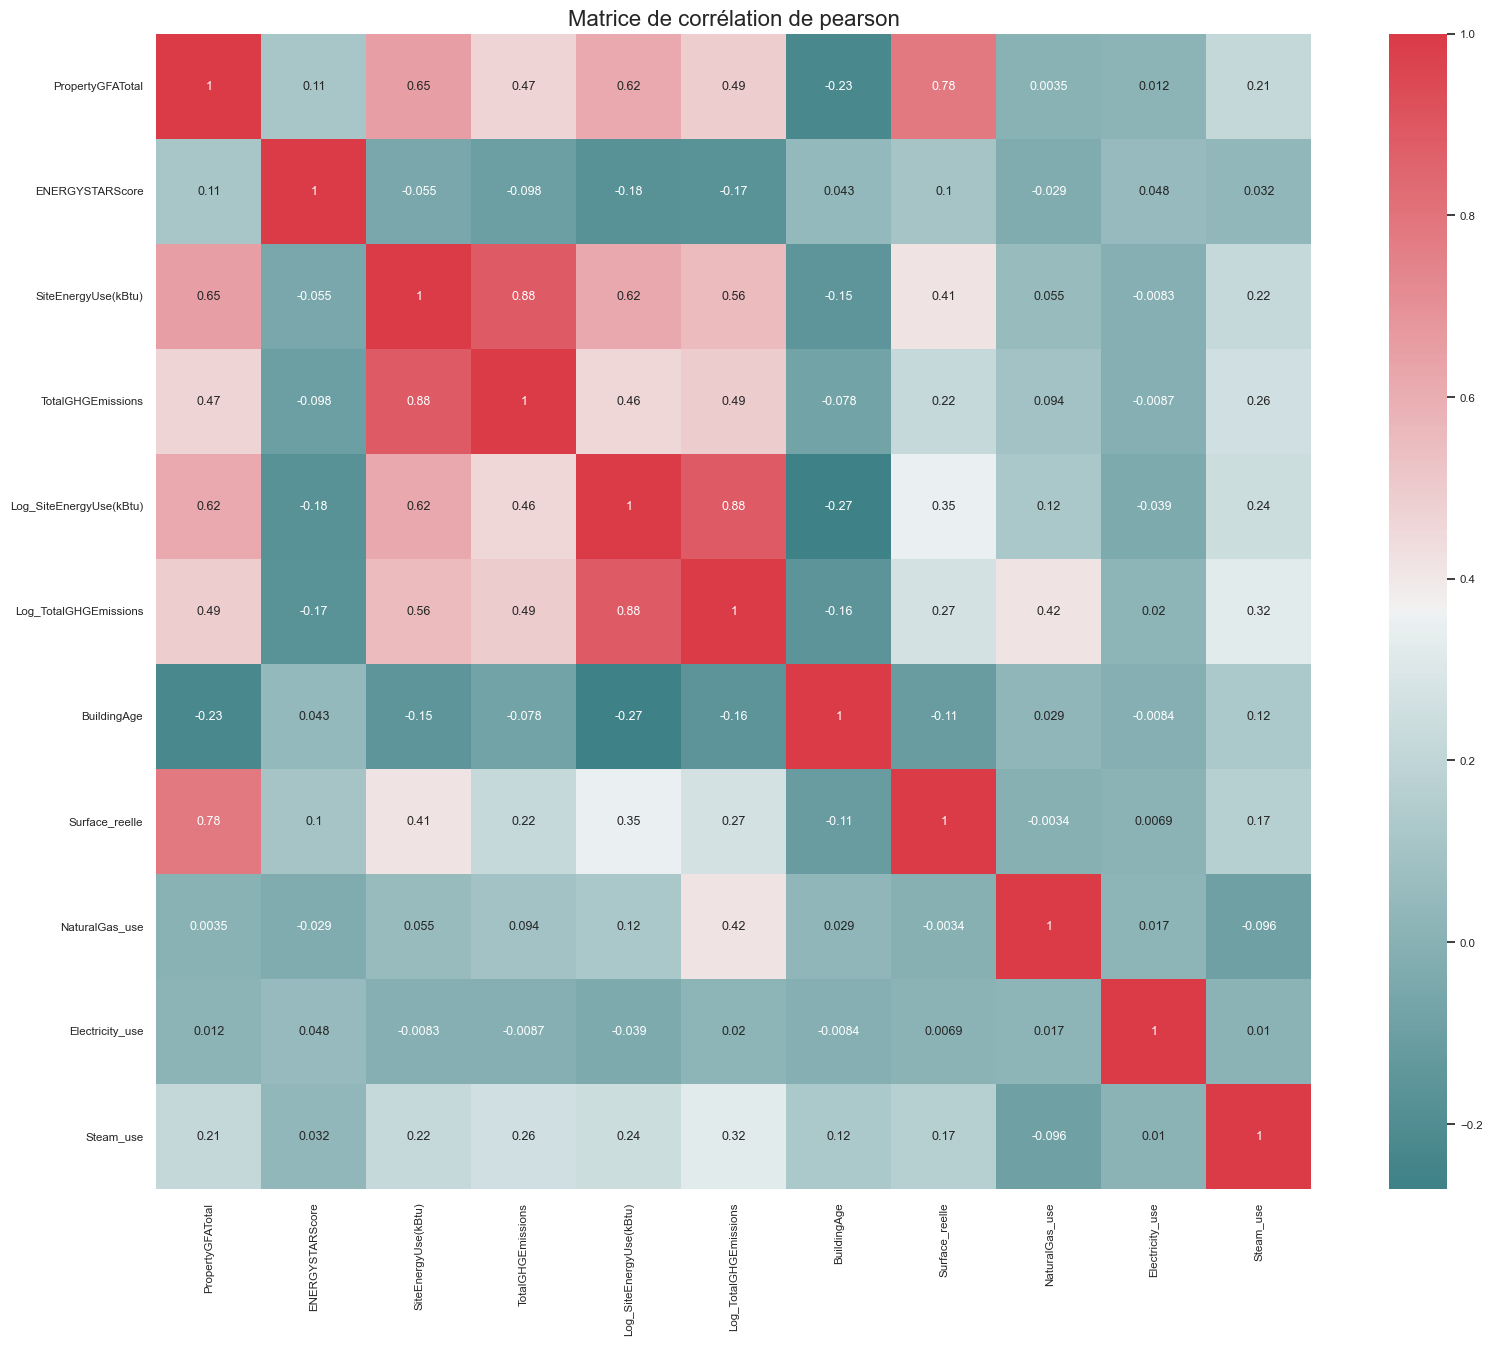

In [67]:
sns.set(font_scale=0.75)
fig, ax = plt.subplots(figsize=(20,15)) 
matrice_correlation = np.triu(num_data.corr())

sns.heatmap(num_data1.corr(),annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True),
            square=True)
plt.title('Matrice de corrélation de pearson', size=16)
plt.show()

In [68]:
# Répresentation graphique de la matrice de corrélation
#sns.set(font_scale=0.75)
#matrice_correlation = np.triu(num_data.corr())
#sns.heatmap(num_data1.corr(),annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True),
 #           square=True)
#plt.title('Matrice de corrélation de pearson', size=16)
#plt.show()

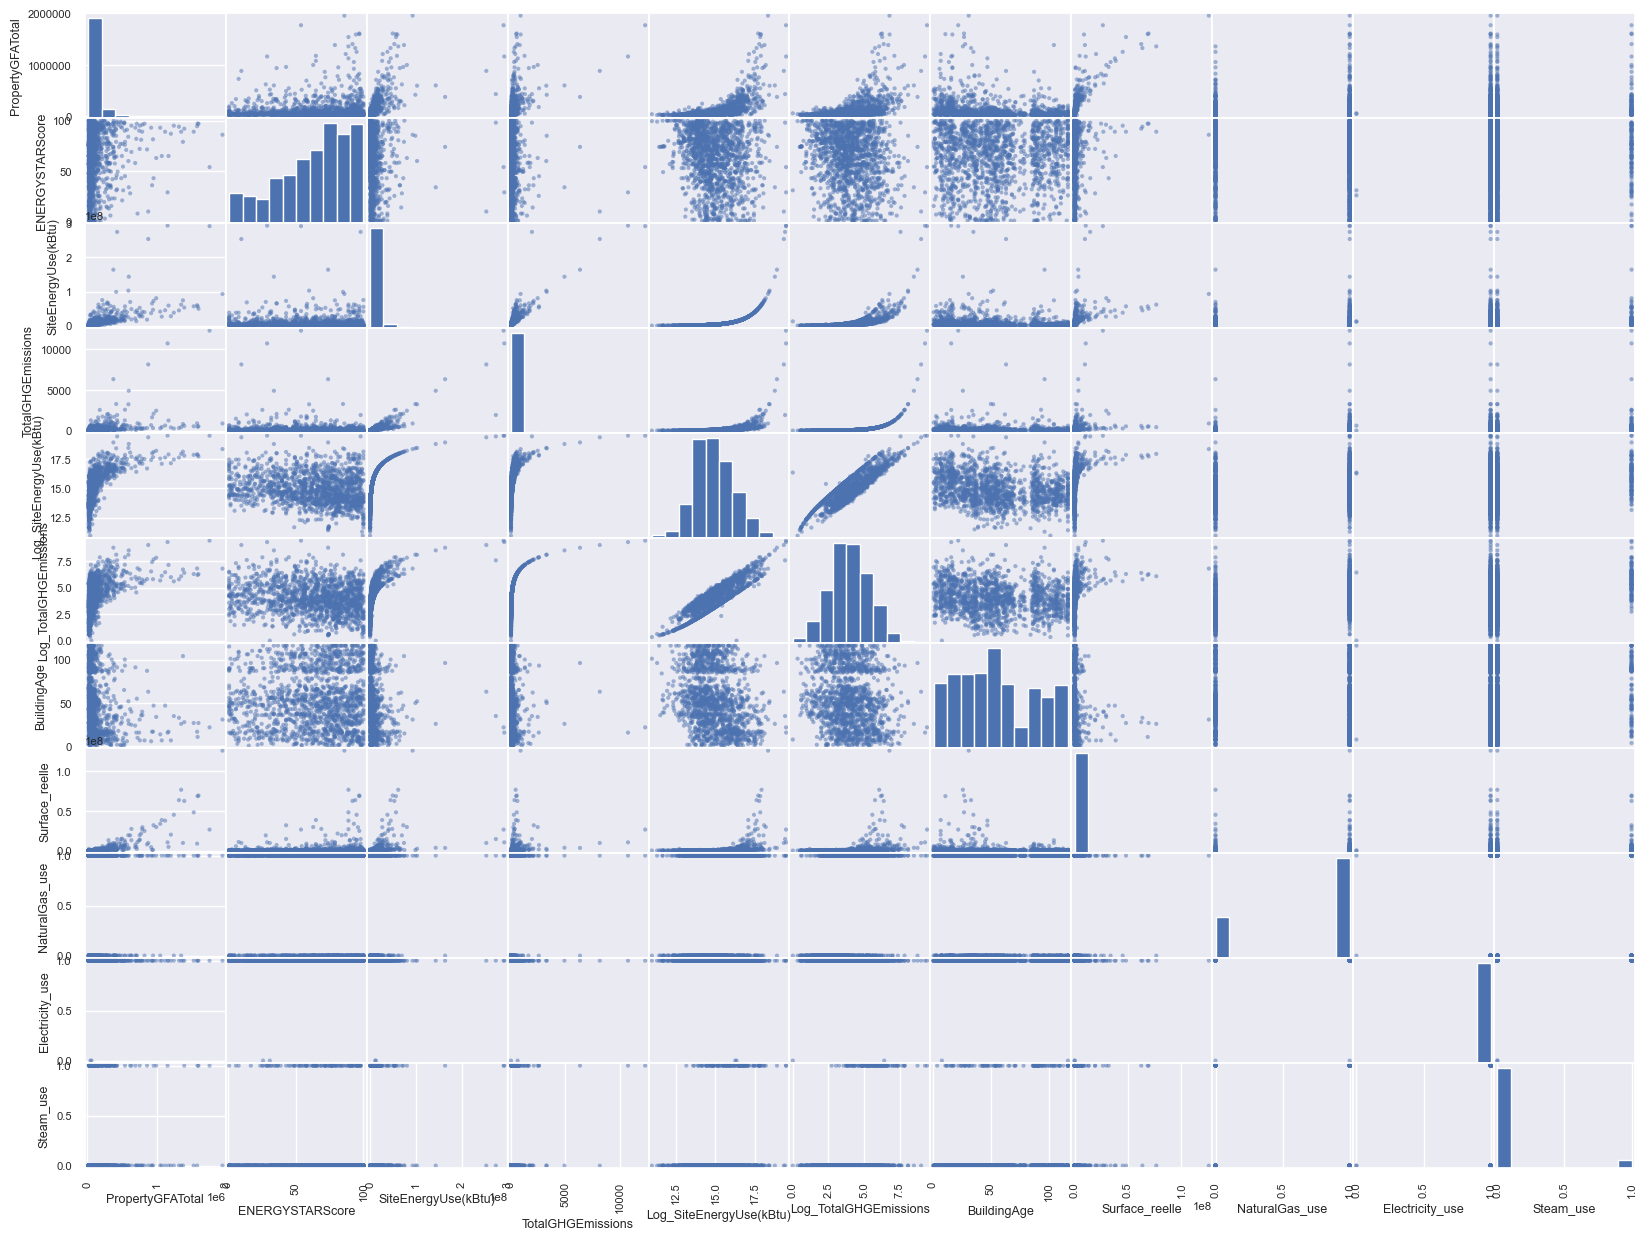

In [69]:
pd.plotting.scatter_matrix(num_data1,figsize=(20,15))
plt.show()

# **Partie 4 : Sauvegarde des données features dans un nouveau CSV**

In [70]:
data_2016_cleaned.to_csv('data_2016_feature.csv', index = False)

In [71]:
data_2016_cleaned.shape

(1523, 12)

In [72]:
data_2016_cleaned.columns

Index(['PrimaryPropertyType', 'PropertyGFATotal', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'Log_SiteEnergyUse(kBtu)',
       'Log_TotalGHGEmissions', 'BuildingAge', 'Surface_reelle',
       'NaturalGas_use', 'Electricity_use', 'Steam_use'],
      dtype='object')